In [2]:
pip install qiskit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.3/4.3 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 240.4/240.4 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 50.0/50.0 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 112.6/112.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.39.4-py3-none-any.whl size=12274 sha256=8773ab53b41a2491979248ca25820bc08cb5c975e62a66dfd93cb5c4a2747520
  Stored in directory: c:\users\kye

In [3]:
## 필요한 패키지 수입하기
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [4]:
## 양자회로 생성하기

circuit = QuantumCircuit(2,2) # 순서대로 2개의 quantum bit와 2개의 classical bit를 가진 quantum circuit 생성
circuit.x(0) # not게이트
circuit.h(1) # hadamard게이트 : 중첩상태 생성
circuit.measure([0,1], [0,1]) # 측정
circuit.draw() # circuit 그리기


┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

{'11': 496, '01': 528}


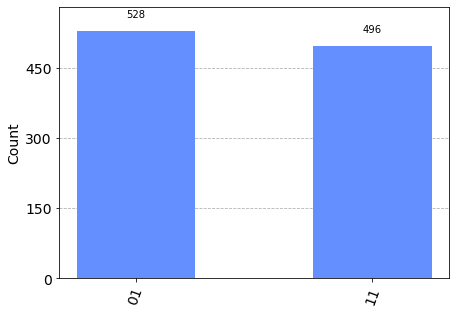

In [5]:
backend = Aer.get_backend('qasm_simulator') # 시뮬레이터
results = execute(circuit, backend).result() # 결과
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [6]:
## 하다마르 게이트
# 단일 큐비트를 중첩 상태로 만드는 유니터리 연산을 하는 게이트
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


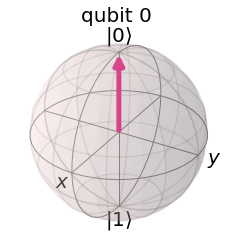

In [7]:
# "quasm_simulater" 대신 "statevector_simulator"를 사용하면 양자 상태를 확인할 수 있다.
from qiskit.visualization import plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result()
states = result.get_statevector()
print(states)
plot_bloch_multivector(states)

In [8]:
## General U gate를 통한 상태 조절(확률조정가능)
from numpy import pi
circuit = QuantumCircuit(1,1)
thet, phi, lamb = -pi/4, pi/4, 0
circuit.u(thet, phi, lamb, 0)
circuit.measure(0,0)
circuit.draw()

┌───────────────┐┌─┐
  q: ┤ U(-π/4,π/4,0) ├┤M├
     └───────────────┘└╥┘
c: 1/══════════════════╩═
                       0

{'0': 878, '1': 146}


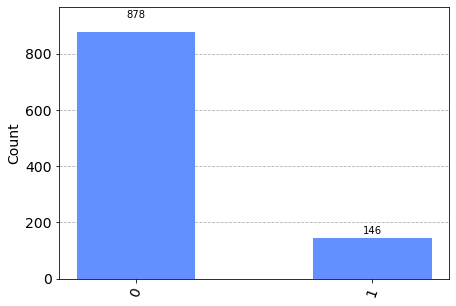

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Statevector([1.+0.j, 0.-0.j],
            dims=(2,))


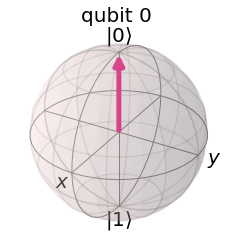

In [10]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result()
states = result.get_statevector()
print(states)
plot_bloch_multivector(states)

In [11]:
## CNOT-Gate : 얽힘 상태를 만들어주는 기본적인 게이트(Pauli-X 게이트)
## SWAP-Gate : 양자 비트를 서로 바꿔주는 게이트

circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

{'11': 486, '00': 538}


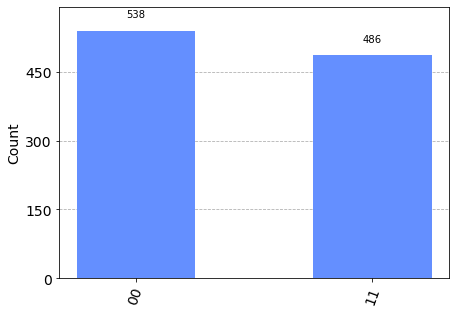

In [12]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


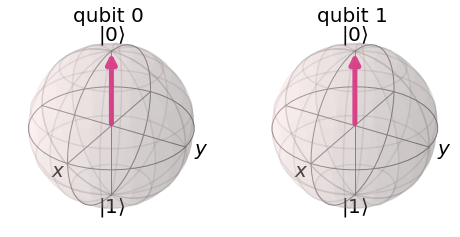

In [13]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result()
states = result.get_statevector()
print(states)
plot_bloch_multivector(states)

In [14]:
## 양자 게이트로 만드는 덧셈 회로
circuit = QuantumCircuit(5,5)
for i in range(3):
    circuit.h(i) # 3개의 양자 비트에 대해 하다마르 게이트를 적용
circuit.barrier() # 선 그어주기
circuit.cx(0, 3) # XOR -> A + B
circuit.cx(1, 3)
circuit.cx(2, 3) 
circuit.ccx(0, 1, 4) # AB + (A+B)C
circuit.ccx(0, 2, 4)
circuit.ccx(1, 2, 4)
circuit.barrier()
circuit.measure([0, 1, 2, 3, 4], [4, 3, 2, 1, 0]) # 측정
circuit.draw()


┌───┐ ░                                ░ ┌─┐            
q_0: ┤ H ├─░───■──────────────■────■────────░─┤M├────────────
     ├───┤ ░   │              │    │        ░ └╥┘┌─┐         
q_1: ┤ H ├─░───┼────■─────────■────┼────■───░──╫─┤M├─────────
     ├───┤ ░   │    │         │    │    │   ░  ║ └╥┘┌─┐      
q_2: ┤ H ├─░───┼────┼────■────┼────■────■───░──╫──╫─┤M├──────
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐  │    │    │   ░  ║  ║ └╥┘┌─┐   
q_3: ──────░─┤ X ├┤ X ├┤ X ├──┼────┼────┼───░──╫──╫──╫─┤M├───
           ░ └───┘└───┘└───┘┌─┴─┐┌─┴─┐┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
q_4: ──────░────────────────┤ X ├┤ X ├┤ X ├─░──╫──╫──╫──╫─┤M├
           ░                └───┘└───┘└───┘ ░  ║  ║  ║  ║ └╥┘
c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
                                               4  3  2  1  0

{'11111': 129, '00110': 145, '11001': 121, '00000': 128, '01010': 108, '10010': 152, '01101': 116, '10101': 125}


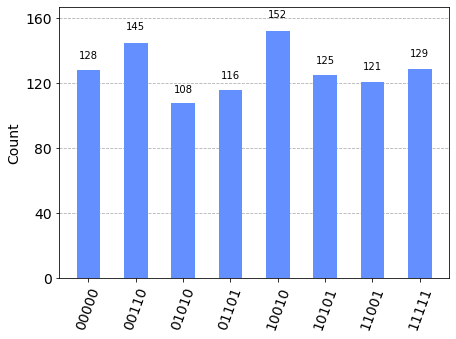

In [17]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)
